In [14]:
import numpy as np
import pickle as pk
from astropy.io import fits
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt


In [12]:
def greater_than(probs, lim):
    temp = probs[probs>lim]
    print(len(temp))
    return temp


In [4]:
def resampler(probs, nsamp = 10000, subsamp = True):
    contaminations = np.zeros(nsamp)
    for j in range(nsamp):
        flags = np.random.randint(len(probs), size = len(probs))
        samp = probs[flags]
        if subsamp:
            true = 0
            for i, cluster in enumerate(samp):
                thing = np.random.rand(1)
                if thing < cluster:
                    true += 1
            contaminations[j] = true/len(samp)
        else:
            contaminations[j] = np.mean(samp)
    return contaminations

In [5]:
mdcw_dict = pk.load(open('info.pickle', 'rb'))

In [6]:
mdcw_catalog = fits.open('/home/s/sievers/sdicker/ACTnCOWs/MADCOWSUnion.fits')

names = mdcw_catalog[1].data['name']
rich = mdcw_catalog[1].data['Rich']
z = mdcw_catalog[1].data['Photz']

In [7]:
#Total number in fit
print(len(mdcw_dict.keys()))

965


In [8]:
probs = np.ndarray(len(mdcw_dict.keys()))
zs = np.ndarray(len(mdcw_dict.keys()))
riches = np.ndarray(len(mdcw_dict.keys()))
for i, key in enumerate(mdcw_dict.keys()):
    probs[i]= mdcw_dict[key]['prob']
    flag = np.where((key == names))[0]
    zs[i] = z[flag]
    riches[i] = rich[flag]

In [9]:
df = pd.DataFrame(np.stack([probs, zs, riches]).T,
                   columns=['Weight', 'Z', r'$\lambda_{15}$'])

In [50]:
conts = resampler(probs, 10000)

In [51]:
print('Contamination: {} +/- {}'.format(np.mean(conts), np.std(conts)))

Contamination: 0.5013840414507771 +/- 0.01579168439987111


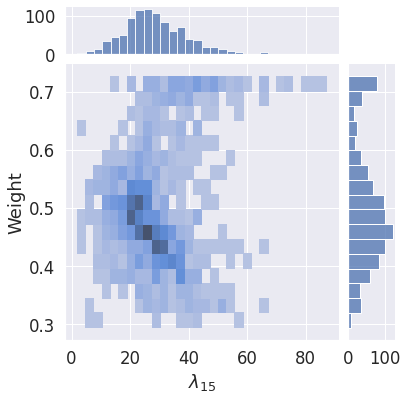

In [47]:
sns.set(font_scale=1.5)
#sns.set()
g = sns.JointGrid(data = df, x = r'$\lambda_{15}$', y = 'Weight', marginal_ticks = True)
 
g.plot(sns.histplot, sns.histplot)

bins = 15

labda_bins = (max(riches)-min(riches))/bins
weight_bins = (max(probs)-min(probs))/bins
#sns.displot(df, x = r'$\lambda_{15}$', y = 'Weight', binwidth=(labda_bins, weight_bins), cbar=True)
#sns.displot(df, x = r'$\lambda_{15}$', y = 'Weight', cbar=True)



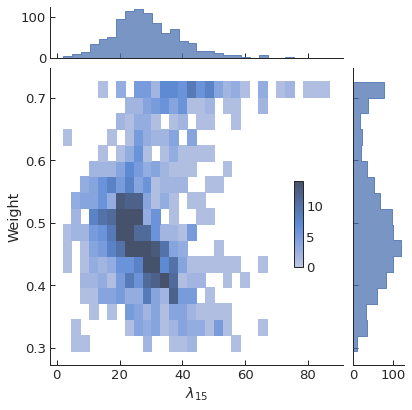

In [77]:
sns.set_style("ticks", {"xtick.direction": "in","ytick.direction": "in"})
sns.set_context("paper",font_scale=1.5)
g = sns.JointGrid(data = df, x = r'$\lambda_{15}$', y = 'Weight', marginal_ticks = True)

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.7, .35, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, #discrete=(True, False),
    #cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step")#, color="#03012d")

plt.savefig('./plots/weights/weights_rich_hist.pdf')
plt.savefig('./plots/weights/weights_rich_hist.png', dpi = 300)
plt.show()
plt.close()